# Modelos lineales regularizados

* una buena manera de reducir el sobreajuste es regularizar el modelo (es decir, restringirlo):
* cuantos menos grados de libertad tenga, más difícil será para él sobreajustar los datos.

Una forma sencilla de regularizar un **modelo polinomial** es reducir el número de grados polinomiales.

Para un **modelo lineal**, la regularización se logra típicamente restringiendo los pesos del modelo.

Ahora veremos:  
* Ridge Regression,   
* Regresión de Lasso y    
* Red elástica,    

que implementan tres formas diferentes de restringir los pesos.

## Ridge Regression

Ridge Regression (también llamada regularización de Tikhonov) es una versión regularizada de Linear Regression: se agrega un término de regularización igual a   

$$ \alpha\sum_{i = 1}^{n} \theta_{i}^{2} $$  

a la función de costo.

**Esto obliga al algoritmo de aprendizaje** 
* no solo a ajustar los datos,
* sino también a mantener los pesos del modelo   lo más pequeños posible. 

Tenga en cuenta que el término de regularización solo debe agregarse a la función de costos durante el entrenamiento.

Una vez entrenado el modelo, se desea utilizar la medida de rendimiento no regularizada para evaluar el
rendimiento del modelo.

## NOTE

Es bastante común que la función de costo utilizada durante el entrenamiento sea diferente de la medida de rendimiento utilizada para las pruebas.

Aparte de la regularización, otra razón por la que podrían ser diferentes es que  
* una buena *función de coste de entrenamiento* debería tener derivados favorables a la optimización,  
* mientras que la *medida de rendimiento* utilizada para las pruebas debería ser lo más cercana posible al objetivo final.

Por ejemplo, los clasificadores a menudo se entrenan usando una función de costo como la pérdida de registros (discutida en un momento) pero se evalúan usando precisión/recuperación.

El hiperparámetro $\alpha$ controla cuánto desea regularizar el modelo.

Si $\alpha = 0$, entonces la regresión de cresta es simplemente una regresión lineal.

Si $\alpha$ es muy grande, entonces todos los pesos terminan muy cerca de cero y el resultado es una línea plana que atraviesa la media de los datos.

La ecuación 4-8 presenta la función de costo de regresión de crestas.

Ecuación 4-8. Función de costo de regresión de cresta 
$$ J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + \alpha \frac{1}{2}\sum_{i=1}^{n}\theta_{i}^{2} $$

$$MSE(\mathbf{X}, h_{\mathbf{\theta}}) = \frac{1}{m} \sum_{i = 1}^{m}(\theta^{T}x^{(i)} -y^{(i)})^{2} $$

Tenga en cuenta que el término de sesgo $\theta_{0}$ no está regularizado (la suma comienza en $i = 1$, no en $0$).

Si definimos $\mathbf{w}$ como el vector de pesos de características ($\theta_{0}$ a $\theta_{n}$), entonces el término de regularización es igual a $1/2(|| \mathbf{w} ||_{2} )^{2}$, donde $|| \mathbf{w} ||_{2}$ representa la norma $\mathcal{l}_{2}$ del vector de pesos.

Para Gradient Descent, simplemente agregue $\alpha \mathbf{w}$ al vector de gradiente MSE (Ecuación 4-6).

## ADVERTENCIA

Es importante escalar los datos (por ejemplo, usando un Escalador estándar) antes de realizar la regresión de crestas, ya que es sensible a la escala de las características de entrada.

Esto es cierto para la mayoría de los modelos regularizados.

La figura 4-17 muestra varios modelos de Ridge entrenados en algunos datos lineales usando diferentes valores de $\alpha$.

A la izquierda, se utilizan modelos sencillos de Ridge, lo que conduce a predicciones lineales.

A la derecha, los datos primero se expanden usando PolynomialFeatures ($grado = 10$), luego se escalan usando un ``StandardScaler``, y finalmente los modelos Ridge se aplican a las características resultantes: esto es Regresión polinomial con regularización de crestas.

Observe cómo aumentar $\alpha$ conduce a predicciones más planas (es decir, menos extremas, más razonables), lo que reduce la varianza del modelo pero aumenta su sesgo.

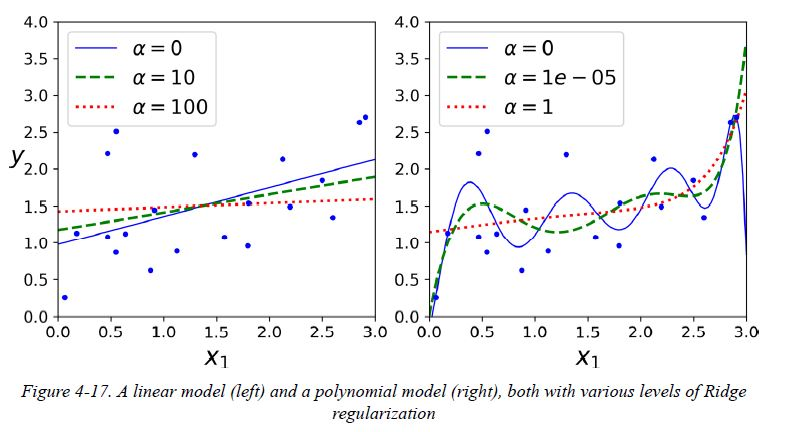

In [1]:
from IPython.display import Image 
Image('figure_4_17.JPG',width=600,height=300) 

Al igual que con la regresión lineal, podemos realizar la regresión de crestas calculando una ecuación de forma cerrada o realizando un gradiente descendente.

Los pros y los contras son los mismos. La ecuación 4-9 muestra la solución de forma cerrada, donde $A$ es la matriz de identidad de $(n + 1) \times (n + 1)$, excepto con un $0$ en la celda superior izquierda, correspondiente al término de sesgo.

Ecuación 4-9. Solución de forma cerrada Ridge Regression

$$ \hat{\mathbf{\theta}} =  (\mathbf{X}^{T}\mathbf{X} + \alpha \mathbf{A})^{-1}\mathbf{X}^{T}\mathbf{y} $$

A continuación se explica cómo realizar la regresión de crestas con Scikit-Learn utilizando una solución de forma cerrada (una variante de la ecuación 4-9 que utiliza una técnica de factorización matricial de André-Louis Cholesky):

In [2]:
import numpy as np 
np.random.seed(48)
m = 100
x = 6 * np.random.rand(m, 1) - 3              
# una matriz de orden 100x1 con 
# valores en el intervalo [-3,3)
y = 3 + 2*x + x**2 + np.random.randn(m, 1)

In [3]:
def f(x):
    return 3+2*x+x**2 

In [4]:
f(1.5) 

8.25

In [5]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_features.fit_transform(x) 

In [6]:

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x_poly, y)
print(ridge_reg.predict([[1.5,1.5**2]])) 
print(ridge_reg.intercept_,ridge_reg.coef_)  

[[8.14431544]]
[2.99206779] [[1.96420306 0.98041914]]


Y usando el Gradiente Descendente Estocástico:

In [7]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(x_poly, y.ravel())
print(sgd_reg.predict([[1.5,1.5**2]]))
print(sgd_reg.intercept_,sgd_reg.coef_) 

[8.12749066]
[2.90931855] [1.97091464 1.00524451]


El hiperparámetro de ``penalty`` establece el tipo de término de regularización que se utilizará.

Especificar ``"l2"`` indica que desea que SGD agregue un término de regularización a la función de costo igual a la mitad del cuadrado de la norma $\mathcal{l}_{2}$ del vector de peso: esto es simplemente Ridge Regression.

## Regresión de lazo

La regresión del operador de selección y contracción mínima absoluta (generalmente llamada simplemente Regresión de lazo) es otra versión regularizada de la regresión lineal:

al igual que Ridge Regression, agrega un término de regularización a la función de costo, pero usa la norma $\mathcal{l}_{1}$ del vector de peso $\mathbf{\theta}$ en lugar de la mitad del cuadrado de la norma $\mathcal{l}_{2}$ (ver Ecuación 4-10).

Ecuación 4-10. Función de costo de regresión de lazo

$$ J(\theta) = MSE(\theta) + \alpha\sum_{i = 1}^{n} |\theta_{i}| $$

La Figura 4-18 muestra lo mismo que la Figura 4-17 pero reemplaza los modelos Ridge con modelos Lasso y usa valores $\alpha$ más pequeños.

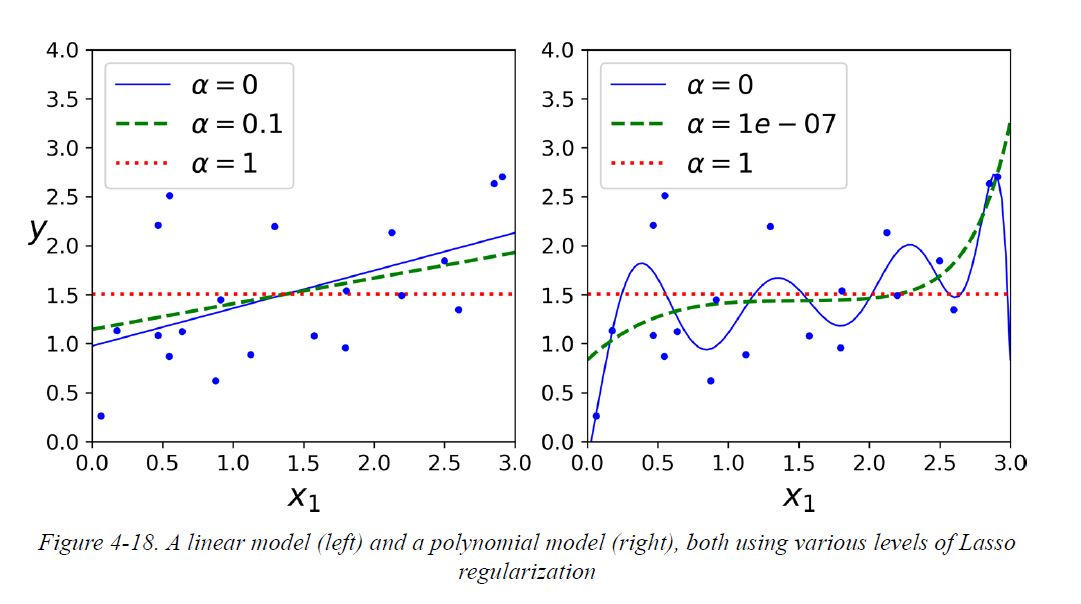

In [8]:
from IPython.display import Image
Image('figure_4_18.jpg',width=600,height=300) 

Una característica importante de la regresión de lazo es que tiende a eliminar las ponderaciones de las características menos importantes (es decir, establecerlas en cero).

Por ejemplo, la línea punteada en el gráfico de la derecha en la Figura 4-18 (con $\alpha = 10^{-7}$) parece cuadrática, casi lineal: todos los pesos de las características polinomiales de alto grado son iguales a cero.

En otras palabras, Lasso Regression realiza automáticamente la selección de características y genera un *sparse model* (es decir, con pocas ponderaciones de características distintas de cero).

Puede tener una idea de por qué este es el caso observando la Figura 4-19: los ejes representan dos parámetros del modelo y los contornos de fondo representan diferentes funciones de pérdida.

En la gráfica superior izquierda, los contornos representan la pérdida de $\mathcal{l}_{1}$ ($|\theta_{1}| + \theta_{2}|$), que cae linealmente a medida que se acerca a cualquier eje.

Por ejemplo, si inicializa los parámetros del modelo en $\theta_{1} = 2$ y $\theta_{2} = 0.5$, ejecutar Gradient Descent disminuirá ambos parámetros por igual (como se representa con la línea amarilla discontinua); por lo tanto, $\theta_{2}$ llegará a 0 primero (ya que estaba más cerca de 0 al principio).

Después de eso, Gradient Descent se deslizará por el canalón hasta llegar a $\theta_{1} = 0$ (con un poco de rebote, ya que los gradientes de $\mathcal{l}_{1}$ nunca se acercan a 0: son $–1$ o $1$ para cada parámetro).

En la gráfica superior derecha, los contornos representan la función de costo de Lasso (es decir, una función de costo de MSE más una pérdida de $\mathcal{l}_{1}$).

Los pequeños círculos blancos muestran la ruta que toma Gradient Descent para optimizar algunos parámetros del modelo que se inicializaron alrededor de $\theta_{1} = 0.25$ y $\theta_{2} = –1$: observe una vez más cómo la ruta llega rápidamente a $\theta_{2} = 0$, luego rueda hacia abajo y termina rebotando alrededor del óptimo global (representado por el cuadrado rojo).

Si aumentamos $\alpha$, el óptimo global se movería a la izquierda a lo largo de la línea amarilla discontinua, mientras que si disminuimos $\alpha$, el óptimo global se movería a la derecha (en este ejemplo, los parámetros óptimos para el MSE no regularizado son $\theta_{1} = 2$ y $\theta_{2} = 0.5$).

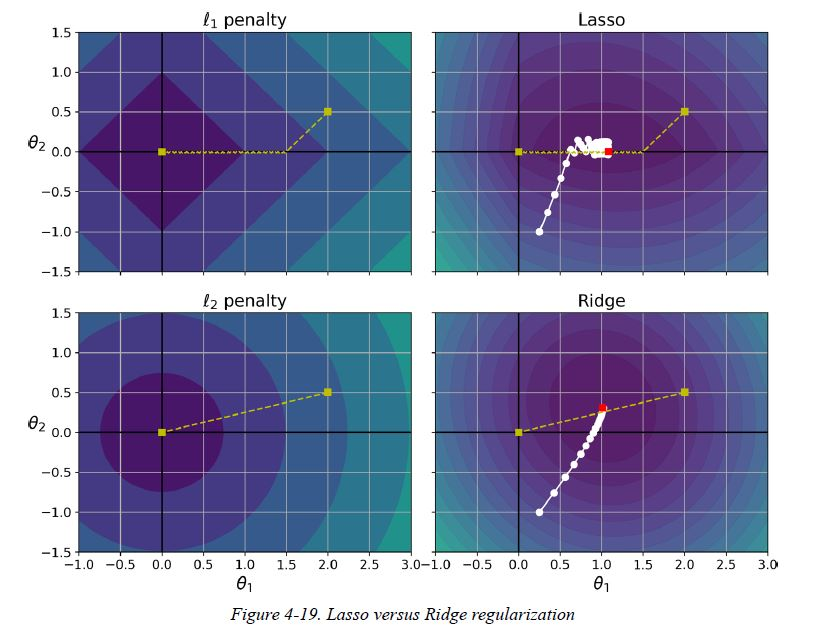

In [9]:
from IPython.display import Image
Image('figure_4_19.jpg',width=600,height=300) 

Los dos gráficos inferiores muestran lo mismo pero con una penalización $\mathcal{l}_{2}$ en su lugar.

En el gráfico inferior izquierdo, puede ver que la pérdida de $\mathcal{l}_{2}$ disminuye con la distancia al origen, por lo que Gradient Descent solo toma un camino recto hacia ese punto.

En la gráfica inferior derecha, los contornos representan la función de costo de la regresión de crestas (es decir, una función de costo de MSE más una pérdida de $\mathcal{l}_{2}$).

Hay dos diferencias principales con Lasso.

Primero, los gradientes se vuelven más pequeños a medida que los parámetros se acercan al óptimo global, por lo que Gradient Descent se ralentiza naturalmente, lo que ayuda a la convergencia (ya que no hay rebotes).

En segundo lugar, los parámetros óptimos (representados por el cuadrado rojo) se acercan cada vez más al origen cuando aumenta $\alpha$, pero nunca se eliminan por completo.

## TIP  

Para evitar que Gradient Descent rebote alrededor del óptimo al final cuando use Lasso, debe reducir gradualmente la tasa de aprendizaje durante el entrenamiento (aún rebotará alrededor del óptimo, pero los pasos serán cada vez más pequeños, por lo que convergerá).

La función de costo de Lasso no es diferenciable en $\theta_{i} = 0$ (para $i = 1, 2, \ldots, n$), pero Gradient Descent aún funciona bien si usa un vector de subgradiente $\mathbf{g}$ en su lugar cuando cualquier $\theta_{i} = 0$.

La ecuación 4-11 muestra una ecuación vectorial de subgradiente que puede usar para Gradient Descent con la función de costo Lasso.

Ecuación 4-11. Vector de subgradiente de regresión de lasso. 

$$ g(\theta,J) = \nabla_{\mathbf{\theta}} MSE(\mathbf{\theta}) + \alpha \begin{pmatrix} sign(\theta_{1}) \\ sign(\theta_{2}) \\ \vdots \\ sign(\theta_{n})  \end{pmatrix}  \quad \text{Donde} \quad sign(\theta_{i}) \begin{cases} -1 & \text{si } \theta_{i} < 0 \\ 
0 & \text{si } \theta_{i} = 0 \\
1 & \text{si } \theta_{i} > 0 
\end{cases} $$

Aquí hay un pequeño ejemplo de Scikit-Learn usando la clase Lasso:

In [10]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_poly, y) 
print(lasso_reg.predict([[1.5,1.5**2]]))  
print(lasso_reg.intercept_,lasso_reg.coef_)

[8.10187952]
[3.02610782] [1.93397275 0.96658337]


Tenga en cuenta que, en su lugar, puede utilizar ``SGDRegressor (penalización = "l1")`` 

In [11]:
from sklearn.linear_model import SGDRegressor 
sgd_reg_2=SGDRegressor(penalty='l1')
sgd_reg_2.fit(x_poly,y) 
print(sgd_reg_2.predict([[1.5,1.5**2]]))
print(sgd_reg_2.intercept_,sgd_reg_2.coef_) 

[8.03686182]
[2.84408222] [1.97175619 0.99339792]


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Red elástica

Elastic Net es un término medio entre Ridge Regression y Lasso Regression.

El término de regularización es una combinación simple de los términos de regularización de Ridge y Lasso, y puede controlar la proporción de mezcla $r$.

Cuando $r = 0$, Elastic Net es equivalente a Ridge Regression, y cuando $r = 1$, es equivalente a Lasso Regression (ver Ecuación 4-12).

Ecuación 4-12. Función de coste neto elástico

$$ J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n} |\theta_{i}| + \frac{1-r}{2}\alpha\sum_{i = 1}^{n} \theta_{i}^{2} $$ 

Entonces, ¿cuándo debería usar Regresión lineal simple (es decir, sin regularización), Ridge, Lasso o Elastic Net?

Casi siempre es preferible tener al menos un poco de regularización, por lo que generalmente debe evitar la Regresión lineal simple.

Ridge es un buen valor predeterminado, pero si sospecha que solo algunas características son útiles, debería preferir Lasso o Elastic Net porque tienden a reducir el peso de las características inútiles a cero, como ya hemos comentado.

En general, se prefiere Elastic Net a Lasso porque Lasso puede comportarse de forma errática cuando el número de funciones es mayor que el número de instancias de entrenamiento o cuando varias funciones están fuertemente correlacionadas.

Aquí hay un breve ejemplo que usa ``Scikit-Learn.ElasticNet`` (``l1_ratio`` corresponde a la proporción de mezcla $r$):

In [12]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_poly, y)
print(elastic_net.predict([[1.5,1.5**2]]))
print(elastic_net.intercept_,elastic_net.coef_) 

[8.07496383]
[3.02519789] [1.91808408 0.9656177 ]


## Parada anticipada

Una forma muy diferente de regularizar algoritmos de aprendizaje iterativo como Gradient Descent es detener el entrenamiento tan pronto como el error de validación alcance el mínimo.

A esto se le llama parada temprana. La figura 4-20 muestra un modelo complejo (en este caso, un modelo de regresión polinomial de alto grado) que se entrena con Batch Gradient Descent.

A medida que pasan las épocas, el algoritmo aprende, y su error de predicción (RMSE) en el conjunto de entrenamiento disminuye, junto con su error de predicción en el conjunto de validación.

Sin embargo, después de un tiempo, el error de validación deja de disminuir y comienza a subir.

Esto indica que el modelo ha comenzado a adaptarse a los datos de entrenamiento.   

Con la detención anticipada, simplemente detienes el entrenamiento tan pronto como el error de validación alcance el mínimo.

It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”

In [ ]:
from IPython.display import Image
Image('figure_4_20.jpg',width=600,height=300) 

## TIP

Con el descenso de gradiente estocástico y de mini lotes, las curvas no son tan suaves y puede ser difícil saber si ha alcanzado el mínimo o no.

Una solución es detenerse solo después de que el error de validación haya estado por encima del mínimo durante algún tiempo (cuando esté seguro de que el modelo no funcionará mejor), luego revertir los parámetros del modelo hasta el punto en que el error de validación fue mínimo. .

A continuación, se muestra una implementación básica de la parada anticipada:

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error 
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
# prepare the data
poly_scaler = Pipeline([
("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)  # aquí es donde se está llamandoa X_train 
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

Tenga en cuenta que con warm_start = True, cuando se llama al método ``fit()``, continúa entrenando donde lo dejó, en lugar de reiniciar desde cero.

## Logistic Regression

Como discutimos en el Capítulo 1, algunos algoritmos de regresión pueden usarse para la clasificación (y viceversa).

La regresión logística (también llamada regresión logit) se usa comúnmente para estimar la probabilidad de que una instancia pertenezca a una clase en particular (por ejemplo, ¿cuál es la probabilidad de que este correo electrónico sea spam?).

Si la probabilidad estimada es superior al 50%, el modelo predice que la instancia pertenece a esa clase (denominada clase positiva, etiquetada como "1") y, de lo contrario, predice que no (es decir, pertenece a la clase negativa , etiquetado como "0"). Esto lo convierte en un clasificador binario.

### Estimating Probabilities

Entonces, ¿cómo funciona la regresión logística?

Al igual que un modelo de regresión lineal, un modelo de regresión logística calcula una suma ponderada de las características de entrada (más un término de sesgo), pero en lugar de generar el resultado directamente como lo hace el modelo de regresión lineal, genera la logística de este resultado (ver Ecuación 4-13).

Ecuación 4-13. Probabilidad estimada del modelo de regresión logística (forma vectorizada)

$$\hat{p} = h_{\mathbf{\theta}}(x) = \sigma(\mathbf{x}^{T}\mathbf{\theta}) $$

La logística, señalada como $\sigma(\cdot)$, es una función sigmoidea (es decir, en forma de $S$) que genera un número entre 0 y 1. Se define como se muestra en la Ecuación 4-14 y la Figura 4-

$$ \sigma(t) = \frac{1}{1+exp(-t)} $$

In [ ]:
from IPython.display import Image 
Image('figure_4_21.JPG',width=600,height=300)